# Deutsch-Jozsa Algorithm

# 1. Intialization

In [1]:
import numpy as np

from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

from qiskit.visualization import plot_histogram

In [2]:
# set the length of the n-bit input string
n = 3

# 2. Constant Oracle

In [6]:
const_oracle = QuantumCircuit(n+1)    # need one more bit to store the output

# generate any random integer 0 or 1
output = np.random.randint(2)
if output == 1:          # if the random integer is 1 then apply an X gate
    const_oracle.x(n)
    
const_oracle.draw()

q_0: 
     
q_1: 
     
q_2: 
     
q_3:

# 3. Balanced Orcale

In [10]:
balanced_oracle = QuantumCircuit(n+1)   # need one more bit to store the output

# We can create a balanced oracle by performing CNOTs with each input qubit 
# as control and the output bit as target. We can vary the input states that 
# give 0 or 1 by wrapping some of the controls in X-gates. 


In [11]:
b_str = "101"   # consider a string

# For each qubit in our circuit, we place an X-gate if the corresponding
# digit in b_str is 1, or do nothing if the digit is 0.

# place X gate
for qubit in range(len(b_str)):    # for number of qubits in the strings(Here 0, 1, 2)
    if b_str[qubit] == '1':        # if the number is 1 then apply an X gate
        balanced_oracle.x(qubit)
        
balanced_oracle.barrier() 

# for CNOTs
for qubit in range(n):
    balanced_oracle.cx(qubit, n)
    
balanced_oracle.barrier() 

# Finally we repeat the code from two cells up tp finish wrapping the controls in X-gate
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

balanced_oracle.draw()         
# here we get an extra q3, which is used to store output


┌───┐ ░                 ░ ┌───┐
q_0: ┤ X ├─░───■─────────────░─┤ X ├
     └───┘ ░   │             ░ └───┘
q_1: ──────░───┼────■────────░──────
     ┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ X ├─░───┼────┼────■───░─┤ X ├
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░──────
           ░ └───┘└───┘└───┘ ░

# 4. Algorithm

In [12]:
# first step is to initialize the input qubits in the state |+> and the output qubit in the state |->

dj_circ = QuantumCircuit(n+1, n) #n+1 qubits and n bits 

# Apply H gate till n-1
for qubit in range(n):
    dj_circ.h(qubit)

# Put output qubit in state |->, i.e the last n qubit
dj_circ.x(n)
dj_circ.h(n)

dj_circ.draw()

┌───┐     
q_0: ┤ H ├─────
     ├───┤     
q_1: ┤ H ├─────
     ├───┤     
q_2: ┤ H ├─────
     ├───┤┌───┐
q_3: ┤ X ├┤ H ├
     └───┘└───┘
c: 3/══════════

 # Applying the oracle

In [13]:
dj_circ += balanced_oracle
dj_circ.draw()

<ipython-input-13-329724047636>:1: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  dj_circ += balanced_oracle
C:\Users\hrith\anaconda3\lib\site-packages\qiskit\circuit\quantumcircuit.py:942: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)


┌───┐┌───┐ ░                 ░ ┌───┐
q_0: ┤ H ├┤ X ├─░───■─────────────░─┤ X ├
     ├───┤└───┘ ░   │             ░ └───┘
q_1: ┤ H ├──────░───┼────■────────░──────
     ├───┤┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ H ├┤ X ├─░───┼────┼────■───░─┤ X ├
     ├───┤├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░──────
     └───┘└───┘ ░ └───┘└───┘└───┘ ░      
c: 3/════════════════════════════════════

In [14]:
# Finally, we perform H-gates on the n-input qubits, and measure our input register

# Repeat H-gates 
for qubit in range(n):
    dj_circ.h(qubit)   # Applying H on n-1 qubits again

dj_circ.barrier()

# Measure
for i in range(n):
    dj_circ.measure(i, i)

dj_circ.draw()

┌───┐┌───┐ ░                 ░ ┌───┐┌───┐ ░ ┌─┐      
q_0: ┤ H ├┤ X ├─░───■─────────────░─┤ X ├┤ H ├─░─┤M├──────
     ├───┤└───┘ ░   │             ░ ├───┤└───┘ ░ └╥┘┌─┐   
q_1: ┤ H ├──────░───┼────■────────░─┤ H ├──────░──╫─┤M├───
     ├───┤┌───┐ ░   │    │        ░ ├───┤┌───┐ ░  ║ └╥┘┌─┐
q_2: ┤ H ├┤ X ├─░───┼────┼────■───░─┤ X ├┤ H ├─░──╫──╫─┤M├
     ├───┤├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘└───┘ ░  ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░────────────░──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘ ░            ░  ║  ║  ║ 
c: 3/═════════════════════════════════════════════╩══╩══╩═
                                                  0  1  2

# 5. Output

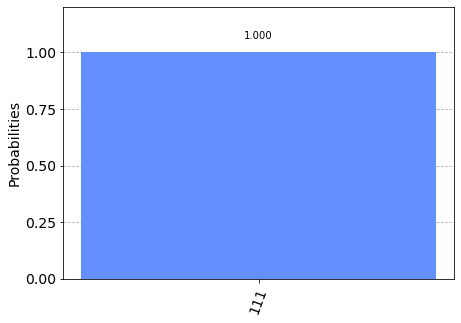

In [15]:
# local simulator

sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(dj_circ, sim)
results = sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

We can see from the results above that we have a 0% chance of measuring 000. This correctly predicts the function is balanced

# 6. Real Device

In [19]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

ibmqfactory.load_account:WARNING:2021-10-25 20:03:43,685: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_belem


In [20]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_dj_circuit = transpile(dj_circ, backend, optimization_level=3)
job = backend.run(transpiled_dj_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


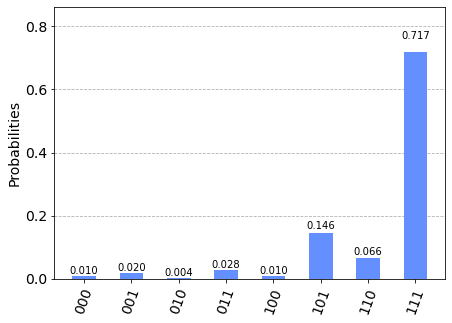

In [21]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

As we can see, the most likely result is 111. The other results are due to errors in the quantum computation.